# Finding Pi in Randomness

Today we are going to be finding π using the most random method possible and then apply this concept to a set of qubits in superposition!

## What is Pi?
In geometry the ratio of the circumference of a circle to its diameter is known as π. The value of π can be estimated from an infinite series of the form:

π / 4 = 1 - (1/3) + (1/5) - (1/7) + (1/9) - (1/11) + ... 

There is another novel approach to calculate π. Imagine that you have a dart board that is 2 units square. It inscribes a circle of unit radius. The center of the circle coincides with the center of the square. Now imagine that you throw darts at that dart board randomly. Then the ratio of the number of darts that fall within the circle to the total number of darts thrown is the same as the ratio of the area of the circle to the area of the square dart board. The area of a circle with unit radius is just π square unit. The area of the dart board is 4 square units. The ratio of the area of the circle to the area of the square is π / 4
 
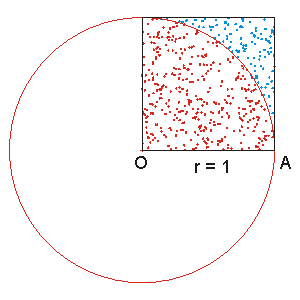

We will only be looking at one quarter of it to keep things simple, and the concept works the same if you want to use the entire circle. If we throw a random dart at the grid containing the unit circle; it can land at any coordinate from (0,0) to (1,1). 

Hopefully this is simple enough so far. 

These will be our steps:
    1) throw a dart
    2) plot it 
    3) determine if it is in the circle
    4) repeat

The magic happens when we do this a large number of time. Out of the chaos, π emerges. For us a large number will be 10,000. the more darts you throw the more accuracy in the number of digits of π you will have :)

Lets start by adding some standard libraries to generate a random number between 0 and 1 and a math function to allow us to easily calculate the square root of a number.

In [164]:
from random import random
from math import sqrt

Now we can add some global variables that will let us tell the computer what we want to do. 
`N` is the number of rounds we will execute, `I` will be our running count of how many points fall inside the unit circle

In [165]:
#number of rounds to run
N=10000
#counter of points inside the unit circle
I=0

Next we will run the code to generate a random `x` & a random `y`coordinate. From this we will take the hypotenuse of the triangle formed between (x,0) (0,y) to get `r`, a radius. If the radius, `r`,  is less than `1` we consider the dot to fall inside the unit circle, > 1 it will be outside.



In [166]:
for i in range(N):
    x = random()
    y = random()
    r = sqrt(x**2 + y**2)
    if r < 1: I +=1

Since our x & y are constrained to positive numbers, this represents only one quadrant of the unit circle. We will take our total number of dots inside the circle over the total number of runs * 4 to represent a full circle distrubution.

In [167]:
pi = 4 * I / N 
print("π has been calculated at: %s. This is based on %s shots out of %s landing inside the unit circle" %(pi, I, N) )

Pi has been calculated at: 3.1368. This is based on 7842 shots out of 10000 landing inside the unit circle


Tada! This number should be close to 3.14 If you want a more accurate estimation, increase the `N` to run more tests. Since Pi is irrational, the program will only get closer and closer to a more accurate π.

## Quantum Darts

Random numbers from computers are not purely random. They follow a mathamatical pattern that is psudo-random. This is due to the fact they start from an off state, operate on logical bits that must be 1 or 0, and must follow some mathmatical algorithim to 'calculate' a psudo-random number. 

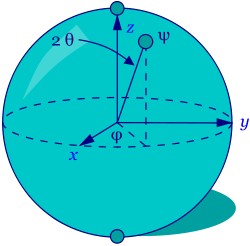




Qubits, the basic unit of calculation for a quantum computer are built different. They can be any state from 0 to 1, all at once. This is known as a superposition. This is often presented in the parable of Schrödinger's cat: 
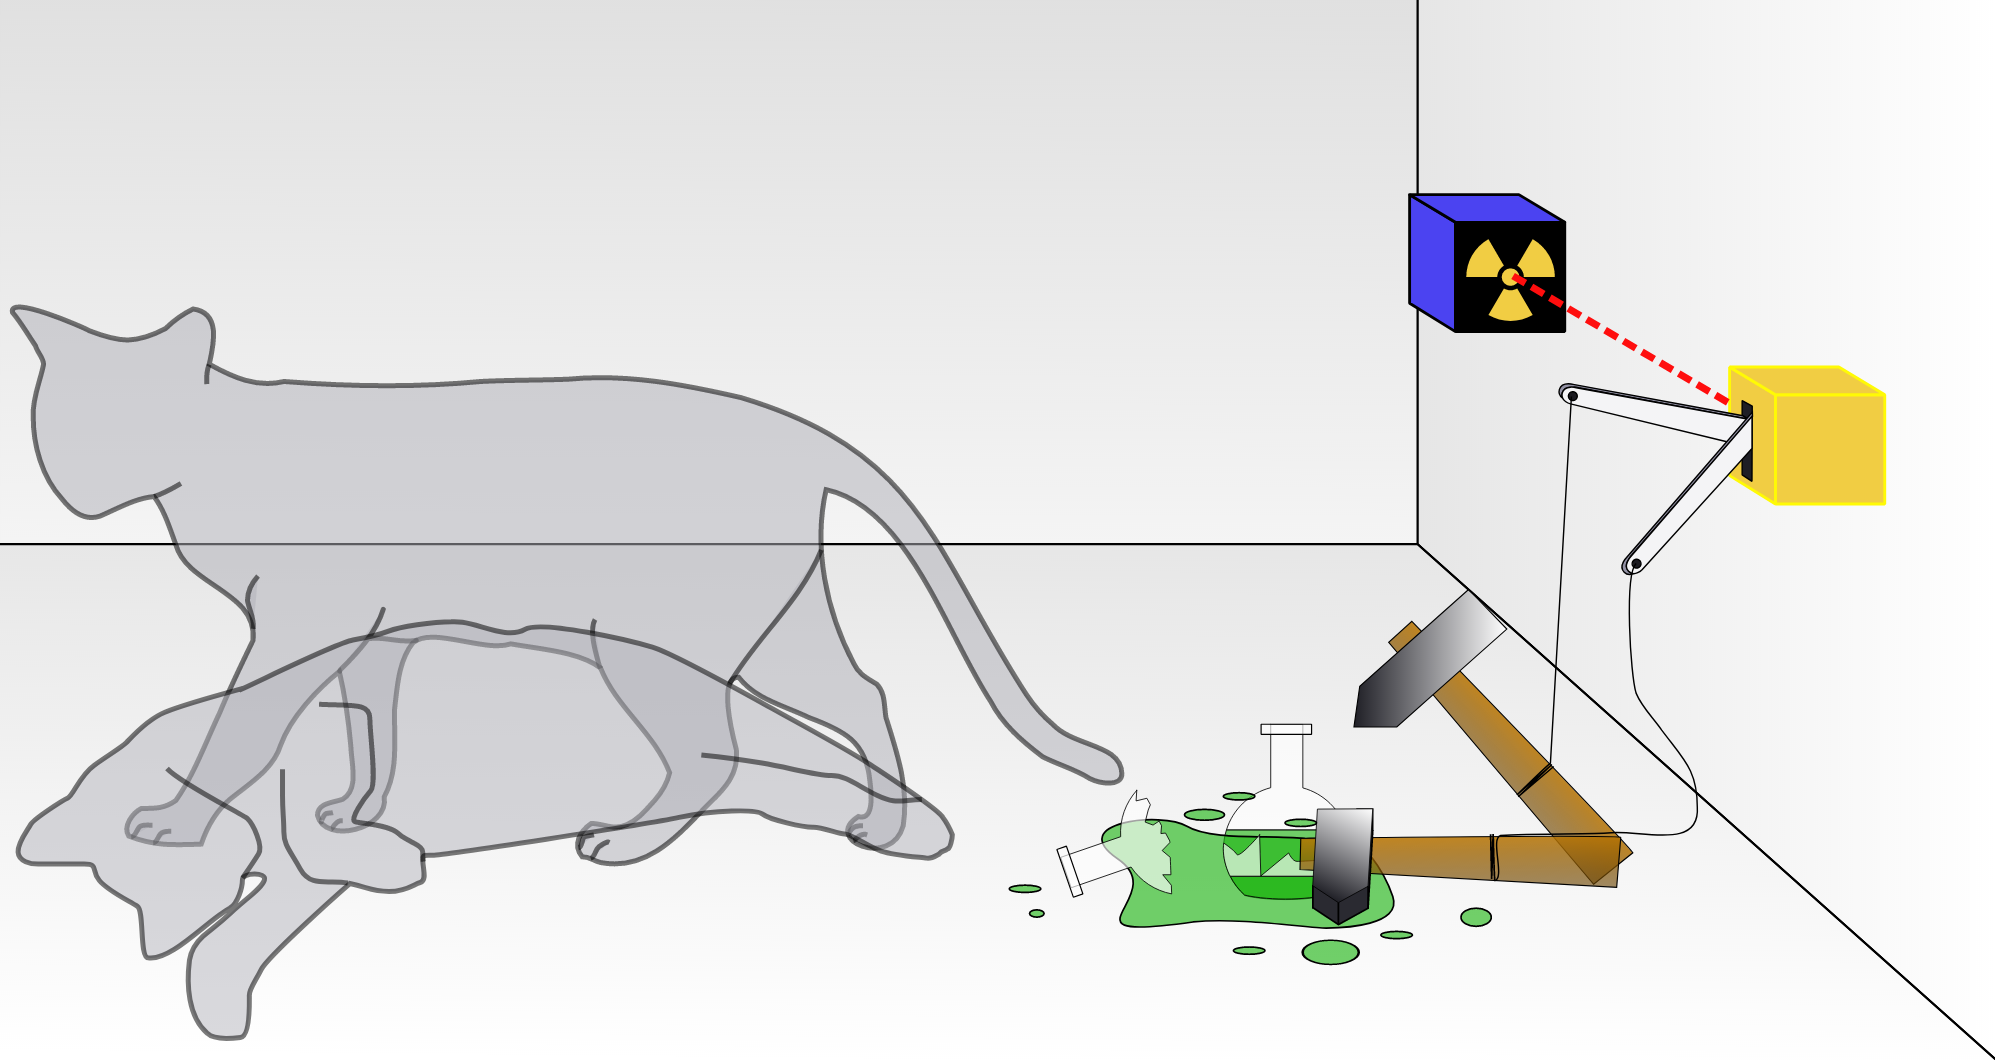

Schrödinger's cat: a cat, a flask of poison, and a radioactive source are placed in a sealed box. If an internal monitor (e.g. Geiger counter) detects radioactivity (i.e. a single atom decaying), the flask is shattered, releasing the poison, which kills the cat. The Copenhagen interpretation of quantum mechanics implies that, after a while, the cat is simultaneously alive and dead. Yet, when one looks in the box, one sees the cat either alive or dead, not both alive and dead. This poses the question of when exactly quantum superposition ends and reality resolves into one possibility or the other./nUntil the box is opened; the cat is in both states alive and dead. Once an observation(measurement) happens the states are fixed and we know the result. 

To simulate darts we will put 100 qubits into superposition and then measure the state. We will use the first 50 quibits for `x` and the second 50 for `y` 

This will give us a number 2^50 possible locations for each `x` and `y`

As before, we will repeat the test a very large number of times in order to be more accurate. 

First we need to load a quantum toolkit, Qiskit:


In [8]:
import numpy as np
# Import Qiskit
import qiskit
from qiskit import Aer, transpile


We next define the number of qubits we will be using:

In [168]:
qbitN = 100

And we create a quantum circuit. In this circuit we will create 100 qubits, run a hadamard gate (putting them in super position), and measure them:

In [154]:
qr = QuantumRegister(qbitN)
cr = ClassicalRegister(qbitN)

qc = QuantumCircuit( qr, cr )
for i in range(qbitN):
    qc.h(i)
qc.measure_all()


Qiskit gives us a toolkit to see what our circut looks like:

In [139]:
qc.draw()

┌───┐ ░ ┌─┐                           
 q132_0: ┤ H ├─░─┤M├───────────────────────────
         ├───┤ ░ └╥┘┌─┐                        
 q132_1: ┤ H ├─░──╫─┤M├────────────────────────
         ├───┤ ░  ║ └╥┘┌─┐                     
 q132_2: ┤ H ├─░──╫──╫─┤M├─────────────────────
         ├───┤ ░  ║  ║ └╥┘┌─┐                  
 q132_3: ┤ H ├─░──╫──╫──╫─┤M├──────────────────
         ├───┤ ░  ║  ║  ║ └╥┘┌─┐               
 q132_4: ┤ H ├─░──╫──╫──╫──╫─┤M├───────────────
         ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐            
 q132_5: ┤ H ├─░──╫──╫──╫──╫──╫─┤M├────────────
         ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐         
 q132_6: ┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├─────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q132_7: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├──────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q132_8: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q132_9: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
  c8: 10/═════════╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
meas: 10/═════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                  0  1  2  3  4  5  6  7  8  9

Next we run the simulation! We define the number of shots we want the system to run(100,000) and transpile the circuit from above. 

In [155]:
nShots = 100000
simulator = Aer.get_backend('qasm_simulator')
circ = transpile(qc, simulator)

result = simulator.run(qc, shots=nShots).result()

With the results we are able to get our counts. We will have a random distrubution from any position, some may even have landed in the same spot! So we need to organize the returned data and count the locations: 

In [156]:
counts = result.get_counts(circ)
theKeys = counts.keys()

Our final step is to plot the coordinates and then find the radius, same as before: 

In [157]:
I = 0
halfBits = int(qbitN / 2)

for coord in theKeys:
    x = int(coord[slice(0, halfBits)], 2) / (2**halfBits )    
    y = int(coord[slice(halfBits, qbitN)], 2) / (2**halfBits )
    r = sqrt(x**2 + y**2)
    if r < 1: I += counts[coord]

In [162]:
pi= 4 * I / nShots 
print("π has been calculated at: %s. This is based on %s shots out of %s landing inside the unit circle" %(pi, I, nShots) )

Pi has been calculated at: 3.1454. This is based on 78635 shots out of 100000 inside the unit circle


The next step is to run this on a real quantum computer!